In [11]:
from math import ceil
import time
import pandas as pd
import numpy as np

In [8]:
%matplotlib inline

We want to factor an RSA public key component (n) into two prime numbers (p, q).

In [2]:
def RSA_factor(n):
    p = 0
    q = 0
    for x in range(2, ceil(n/2)):
        if n % x == 0:
            p = n // x
            q = x
            break
    return p, q

(Brute force implementation)

In [7]:
ns = [138659, 13045583, 89520689]
ts = []

for n in ns:
  t1 = time.time()
  print(RSA_factor(n))
  t2 = time.time()
  ts.append(t2 - t1)
  print("Factoring takes {:.10f} seconds".format(t2 - t1))

(443, 313)
Factoring takes 0.0009260178 seconds
(3643, 3581)
Factoring takes 0.0020017624 seconds
(9721, 9209)
Factoring takes 0.0025634766 seconds


Comparing the time it takes to factor ns of different magnitude.

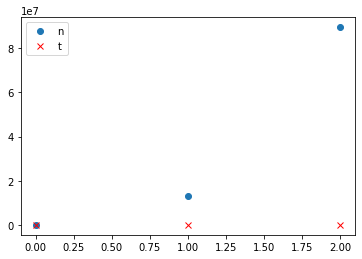

In [14]:

data = {'n' : np.asarray(ns),
     't' : np.asarray(ts)}

df = pd.DataFrame(data)

df.plot(style=['o','rx'])